In [2]:
using DataFrames, PythonPlot, Distributions
using SpecialFunctions 
PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"


"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

In [2]:
dt = 0.01
τ =3
D = 0.01
σY = 0.05
σx = sqrt(D*τ)
α = 0.5
θ_OU = τ,D,α,σY,dt
θ_RG = σx,α,σY,dt,0.5
init = [0,1.,1]

num_cells = 45
num_lins = 1



data= make_lineages(generator_OU,init,θ_OU,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));
df_OU =df

data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
df = DataFrame(data,["time","x","length","cell", "lineage"]);
df = df[df.cell .> 10,:];
df.time = df.time .- df.time[1];
df.cell = df.cell .- minimum(df.cell);
df[:,:T] = cumsum(df.x)*mean(diff(df.time));
df_RG = df;

In [65]:
df_RG

Row,time,x,length,cell,lineage,T
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.784496,0.910014,0.0,1.0,0.00784496
2,0.01,0.784496,0.917153,0.0,1.0,0.0156899
3,0.02,0.784496,0.924348,0.0,1.0,0.0235349
4,0.03,0.784496,0.931599,0.0,1.0,0.0313799
5,0.04,0.784496,0.938908,0.0,1.0,0.0392248
6,0.05,0.784496,0.946273,0.0,1.0,0.0470698
7,0.06,0.784496,0.953697,0.0,1.0,0.0549147
8,0.07,0.784496,0.961179,0.0,1.0,0.0627597
9,0.08,0.784496,0.968719,0.0,1.0,0.0706047


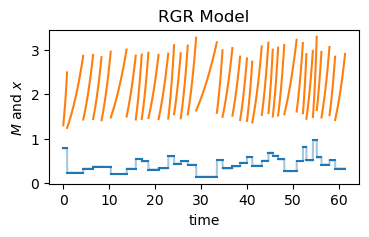

In [66]:
fig,ax = subplots(figsize=(4,2))

ax.set_title("RGR Model")##
ax.plot(df_RG.time,df_RG.x,"C0",alpha=0.4)
for cell in unique(df_RG.cell)
    df = df_RG[df_RG.cell .== cell,:]
    ax.plot(df.time,df.x,"C0")
    ax.plot(df.time,df.length/0.7,"C1")
end
ax.set_ylabel(L"M\text{ and }x")
ax.set_xlabel("time")



#savefig(FIG_PATH*"/OU_vs_RGR.pdf",bbox_inches="tight")
fig



In [ ]:
dt = 0.01
τ =3
D = 0.01
σY = 0.05
σx = sqrt(D*τ)
α = 0.5
θ_OU = τ,D,α,σY,dt
θ_RG = σx,α,σY,dt
init = [0,1.,1]
num_cells = 5000

σxrange = collect(0.01:0.01:0.6)

data_all_params1 = []
data_all_params2 = []
for i in 1:length(σxrange)
    θ_RG = σxrange[i],α,σY,dt,0.6
    data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df_RG = df;


    push!(data_all_params1,df_RG)

    θ_RG = σxrange[i],α,σY,dt,0.
    data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df_RG = df;
    push!(data_all_params2,df_RG)
end

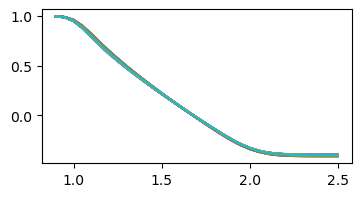

In [61]:
fig,ax = subplots(figsize=(4,2))
lrange = collect(0.9:0.05:2.5)
for d in data_all_params1
    l = d.length
    ax.plot(lrange,1 .-[sum(l[l .< s])/length(l) for s in lrange])
end
fig

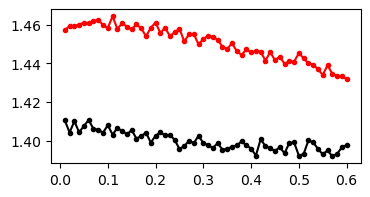

In [62]:

fig,ax = subplots(figsize=(4,2))

means = [mean(d.length) for d in data_all_params1]
ax.plot(σxrange,means,"k.-")

means = [mean(d.length) for d in data_all_params2]
ax.plot(σxrange,means,"r.-")
fig